<a href="https://colab.research.google.com/github/Shradha1304/myrepo/blob/main/2_letter_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv("letter-recognition.data", sep = ",")

In [ ]:
dataset.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [ ]:
X = dataset.iloc[:, 1 : 17]
Y = dataset.select_dtypes(include = [object])

In [ ]:
print(X)

       2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
0      5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
1      4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
2      7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
3      2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
4      4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7
...   ..  .. .. .. ..  ...  .. .. ..  ...  ..  ...  ...  ...  ...  ...
19994  2   2  3  3  2    7   7  7  6    6   6    4    2    8    3    7
19995  7  10  8  8  4    4   8  6  9   12   9   13    2    9    3    7
19996  6   9  6  7  5    6  11  3  7   11   9    5    2   12    2    4
19997  2   3  4  2  1    8   7  2  6   10   6    8    1    9    5    8
19998  4   9  6  6  2    9   5  3  1    8   1    8    2    7    2    8

[19999 rows x 16 columns]


In [ ]:
print(Y)

       T
0      I
1      D
2      N
3      G
4      S
...   ..
19994  D
19995  C
19996  T
19997  S
19998  A

[19999 rows x 1 columns]


In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


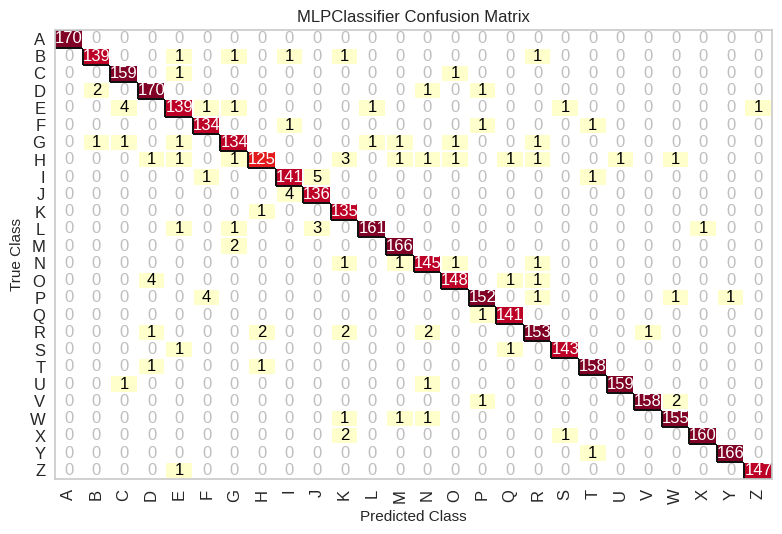

In [ ]:
from yellowbrick.classifier import confusion_matrix
cm = confusion_matrix(mlp,X_train,Y_train, X_validation, Y_validation, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [ ]:
# !pip install yellowbrick

In [ ]:
cm.fit(X_train, Y_train.values.ravel())

ConfusionMatrix(ax=<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x0000015FD8E45F88>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

In [ ]:
cm.score(X_validation, Y_validation)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97625

In [ ]:
predictions = cm.predict(X_validation)
predictions

array(['C', 'I', 'H', ..., 'H', 'B', 'W'], dtype='<U1')

In [ ]:
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.97625
